In [1]:
from mylab.ana.miniscope.context_exposure.Cminiana import MiniAna as MA
from sklearn.decomposition import PCA
from mylab.ana.miniscope.context_exposure.ana_funtions import *
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import glob,sys,os,re

# for part1
we could analysis **context cell**,**running direction cell** and **place cell**:
the change of the proportion along sessions.

## load data

In [2]:
file_path = r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1"
sessions = glob.glob(os.path.join(file_path,"session*.pkl"))
sessions



['\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session1.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session2.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session3.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session4.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session5.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session6.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-f

In [3]:
s1 = MA(sessions[0])
s2 = MA(sessions[1])

FUN:: _load_session
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1\session1.pkl
loaded
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'Trial_Num', 'process'])
'sigraw' is taken as original self.df
'sigraw' is taken as original self.df
FUN:: _load_session
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1\session2.pkl
loaded
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'Trial_Num', 'process', 'aligned_behave2ms', 'behavevideoframe', 'is_in_context', 'is_in_lineartrack', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points

In [4]:
s2.align_behave_ms()
s2.add_Trial_Num_Process()
s2.add_alltrack_placebin_num()
s2.add_Context()
s2.trim_df("S_dff",placebin = np.arange(0,56))
index = s2.trim_index.all(axis=1)

FUN:: aligned_behave2ms
FUN:: aligned_behave2ms
behaveiroal timestamps were aligned to ms
behaveiroal timestamps were aligned to ms
Fun:: add_Trial_Num_Process
Fun:: add_Trial_Num_Process
('Trial_Num', 'process') is saved at \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1\session2.pkl
('Trial_Num', 'process') is saved at \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1\session2.pkl
'place_bin_No' has been there
'place_bin_No' has been there
'Context' was there
'Context' was there
'Context' was represented as 0,1,2 or -1
'Context' was represented as 0,1,2 or -1
trim_index was initialed by Trial_Num>=0
trim_index was initialed by Trial_Num>=0
trim_index : trial are limited in [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
tr

In [5]:
sigraw = s2.df[index]
placebins = s2.result["place_bin_No"][index]
context = s2.result["Context"][index]

In [6]:
context_0 = context==0; 
context_1 = context==1; 
context_2 = context==2; 

In [7]:
x_0 = sigraw[context_0].groupby(placebins[context_0]).mean().values
x_1 = sigraw[context_1].groupby(placebins[context_1]).mean().values
x_2 = sigraw[context_2].groupby(placebins[context_2]).mean().values

## PCA

In [41]:
x_0.shape

(56, 104)

In [40]:
pca_0 = PCA()
pca_0 = pca_0.fit(x_0)
x_dr_0 = pca_0.transform(x_0)

In [42]:
x_dr_0.shape

(56, 56)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca_0 = PCA(10)
pca_0 = pca_0.fit(x_0)
x_dr_0 = pca_0.transform(x_0)

pca_1 = PCA(10)
pca_1 = pca_1.fit(x_1)
x_dr_1 = pca_1.transform(x_1)

pca_2 = PCA(10)
pca_2 = pca_2.fit(x_2)
x_dr_2 = pca_2.transform(x_2)

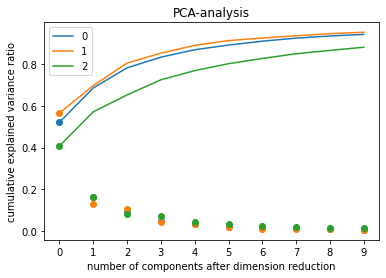

In [17]:
for pca in [pca_0,pca_1,pca_2]:
    plt.plot(np.arange(0,10),np.cumsum(pca.explained_variance_ratio_)[0:10])
    plt.scatter(np.arange(0,10),pca.explained_variance_ratio_[0:10])
    plt.xticks(np.arange(0,10)) #这是为了限制坐标轴显示为整数
    plt.xlabel("number of components after dimension reduction")
    plt.ylabel("cumulative explained variance ratio")
    plt.title("PCA-analysis")
plt.legend([0,1,2])
plt.show()


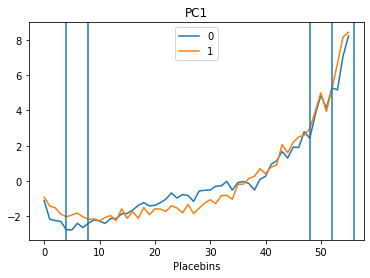

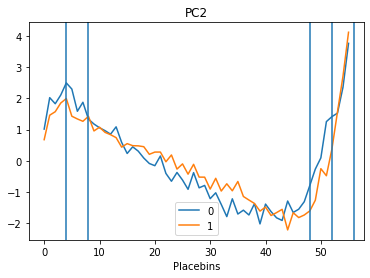

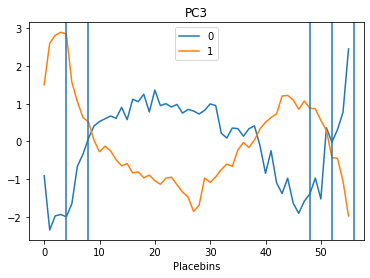

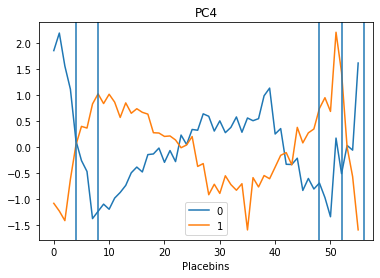

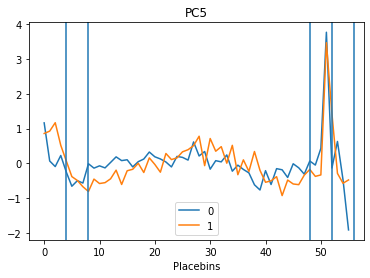

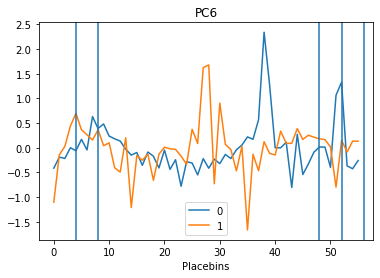

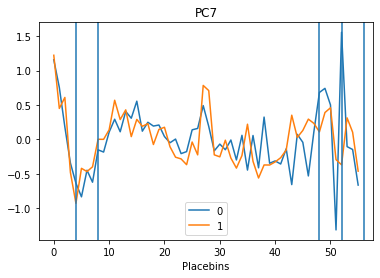

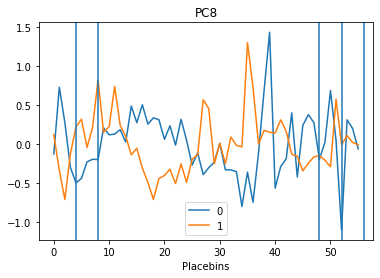

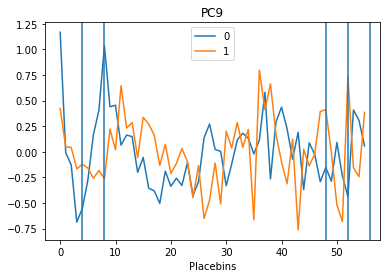

In [54]:
for c in [0,1,2,3,4,5,6,7,8]:
    for x_dr in [x_dr_0,x_dr_1]:
        plt.plot(np.arange(0,len(x_dr)),x_dr[:,c])
        plt.legend([0,1])
    for x in [4,8,48,52,56]:
        plt.axvline(x)
    plt.title("PC%s"%(c+1))
    plt.xlabel("Placebins")
    plt.show()

In [65]:
from sklearn import datasets

In [66]:
iris = datasets.load_iris()

In [67]:
X = iris.data

In [69]:
X.shape

(150, 4)

## generate funtions for plot single cell

In [321]:
Context_Matrix_info = SingleCell_MeanFr_in_SingleTrial_along_Placebin(
    s
    ,df=None
    ,contexts=None
    ,place_bins=list(np.arange(8,50)) # placebins only in context
    ,idxes = None
    ,trials=None)
print(Context_Matrix_info.keys())
plot,plot2 = plot_MeanFr_along_Placebin(Context_Matrix_info)

NameError: name 'SingleCell_MeanFr_in_SingleTrial_along_Placebin' is not defined

In [13]:
s.result.keys()

dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'Trial_Num', 'process', 'behavevideoframe', 'all_track_points', 'aligned_behave2ms', 'place_bin_No', 'Context'])

### looking through each cell idx by inputing different cellid

In [320]:
idx=5
context=0
plot(idx,context);plot2(idx)

NameError: name 'plot' is not defined

In [6]:
Context_dataframe_info = SingleCell_trace_in_SingleTrial(s,place_bins=list(np.arange(4,53)))


'Context' was there
'Context' was represented as 0,1,2 or -1
'place_bin_No' has been there
Body_speed has been there
screen df according to given contexts


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\logging\__init__.py", line 1029, in emit
    self.flush()
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\logging\__init__.py", line 1009, in flush
    self.stream.flush()
FileNotFoundError: [Errno 2] No such file or directory
Call stack:
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\Sab

screen df according to given place bins
screen df according to given tirals


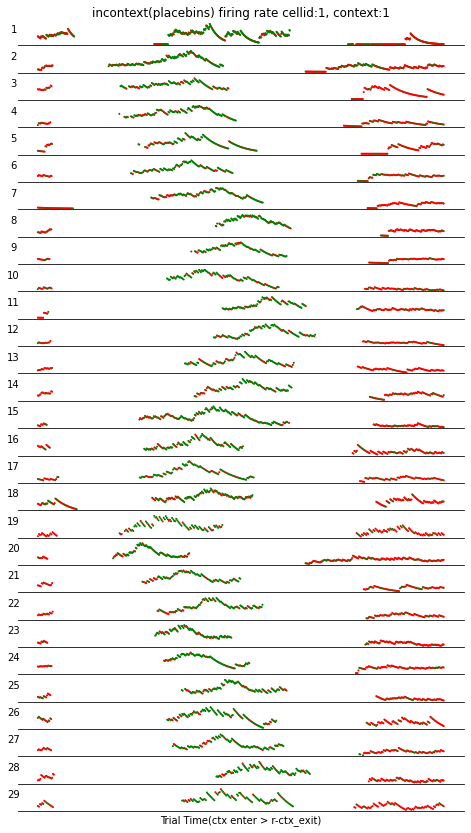

In [7]:
plot=plot_trace_with_running_direction(Context_dataframe_info)

plot(1,1)